# Credit Risk Evaluator

In [21]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [3]:
# Import the data
lending_df = pd.read_csv("Resources/lending_data.csv")
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [4]:
# checking the type of the value into the dataset
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [5]:
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
y = lending_df['loan_status'].values
X = lending_df.drop('loan_status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [6]:
#scaling data based on the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [8]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [9]:
# Train a Logistic Regression model and print the model score
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9919177328380795
Testing Data Score: 0.9924680148576145


In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)


array([[18699,    93],
       [   53,   539]])

In [12]:
# retrieving the accuracy
tp,tn,fp,fn = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn) 
# (18663 + 563) / (18663 + 563 + 56 + 102)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9694593479158069


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [16]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


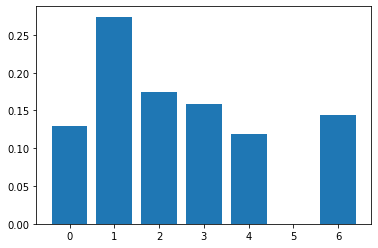

In [22]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [24]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

In [25]:
# Fit a LogisticRegression model and RandomForestClassifier model
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [26]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [27]:
clf = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*

From the output displayed, both models testing score have a very low significant difference. 
The LRM has a testing score of 0.9918 while the RFM's testing score 0.9917.
However, with the training score of RFM been higher than that of the LRM, we can agree that both models show a positive trend and my predictions were wrong.  
